In [29]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np

pplib.imports()
def fill_mean(ax, data, kwargs):
    x = data[0]
    y = np.mean(np.array([data[1], data[2]]), axis = 0)
    kwargs['alpha'] = 1
    ax.plot(x, y, **kwargs)
    return

In [50]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/2-10_pkdatasort.pkl', 'rb'))

ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))

ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')

ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', fontsize = 16)
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67, 50])

ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
ds.displayAs('color', ['red', 'blue'], ['HI $\\times$ Red', 'HI $\\times$ Blue'])
ds.displayAs('color_cut', ['0.60', '0.55', '0.65'], ['g - r = 0.60', 'g - r = 0.55', 'g - r = 0.65'])
ds.setXLabel(pplib.wnum())

In [51]:
ds.loadHdf5('../color-mass.hdf5', new_props = {'result_type':'hist'})

In [52]:
def plot_hist(ax, data, kwargs):
    x = data[0, :]
    y = data[1, :]
    data = data[2:, :]
    gr = np.sum(data, axis = 0)
    mask_zero = gr >= 1
    ax.plot(y[mask_zero], gr[mask_zero], **kwargs)
    return

The row values for color: ['blue', 'red']
The column values for : ['no key found']


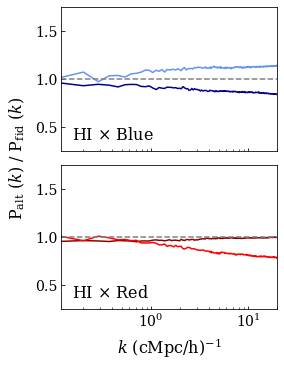

In [95]:
ip = {'path':['dust'], 'fieldname':'hisubhalo_galaxy', 'is_auto':False, 
      'color':['blue','red'], 'space':'real', 'snapshot':99, 'color_cut':['0.55', '0.60', '0.65'],
     'simname':'tng100', 'post_process':'no key found'}
# ds.printMatching(ip)
fg = ds.figrid('color_cut', 'color', '', ip)
fg.setPanelsize(3, 2)
cutcols = {'blue':['darkblue', 'cornflowerblue'], 'red':['darkred', 'red']}
fg.setXLabel(pplib.wnum())
fg.setYLabel(pplib.pkrat('alt', 'fid'))
idxs = {'blue':(0,0), 'red':(1, 0)}
for col in ['blue', 'red']:
    fg.plotArgs({'color_cut':'0.55', 'color':col}, label = 'g - r = 0.55', color = cutcols[col][0])
    fg.plotArgs({'color_cut':'0.65', 'color':col}, label = 'g - r = 0.65', color = cutcols[col][1])
fg.autoNorm({'color_cut':'0.60'})
fg.autoFill(alpha = 0.6)
fg.axisArgs(yscale = 'linear', ylim = (0.25, 1.75))
fg.setFunc({'figrid_process':'fill'}, fill_mean)
fg.setDefaultTicksParams()
fg.gspecArgs(yborder = (0, 0.35), hspace = 0.1)
fg.plotOnes()
fg.legendArgs(rm_legend = True)
fg.plot()


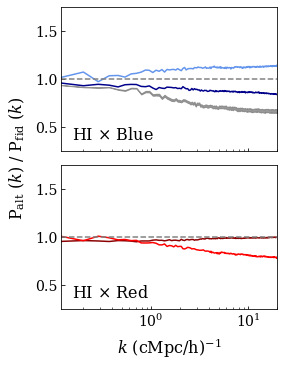

In [96]:
import copy
ip['color_cut'] = '0.60'
ip['color'] = 'blue'
dip = copy.copy(ip)
dip['fieldname'] = 'hisubhalo_galaxy_dust'
temp = ds.getMatching(ip)
ks = temp[0].getData()[0]
models = ds.getAttrVals('model')
maxs = np.zeros(len(ks))
mins = np.zeros_like(maxs)
mins[:] = np.inf
for m in models:
    if 'm_hi' in m:
        ip['model'] = m
        dip['model'] = m
        dust = ds.getMatching(dip)
        ndust = ds.getMatching(ip)
        dpk = dust[0].getData()[1]
        npk = ndust[0].getData()[1]
        rat = dpk / npk
        maxs = np.maximum(maxs, rat)
        mins = np.minimum(mins, rat)
ax = fg.axes[0,0]
ax.fill_between(ks, mins, maxs, color = 'gray', alpha = 0.8)
fg.fig

In [97]:
import copy
ip['color_cut'] = '0.60'
ip['color'] = 'red'
dip = copy.copy(ip)
dip['fieldname'] = 'hisubhalo_galaxy_dust'
temp = ds.getMatching(ip)
ks = temp[0].getData()[0]
models = ds.getAttrVals('model')
maxs = np.zeros(len(ks))
mins = np.zeros_like(maxs)
mins[:] = np.inf
for m in models:
    if 'm_hi' in m:
        ip['model'] = m
        dip['model'] = m
        dust = ds.getMatching(dip)
        ndust = ds.getMatching(ip)
        dpk = dust[0].getData()[1]
        npk = ndust[0].getData()[1]
        rat = dpk / npk
        maxs = np.maximum(maxs, rat)
        mins = np.minimum(mins, rat)
ax = fg.axes[1,0]
ax.fill_between(ks, mins, maxs, color = 'gray', alpha = 0.8, label = 'Dust')
ax.legend(loc = 'upper right', frameon = False, ncol = 2, fontsize = 12)
fg.fig
fg.fig.savefig('/Users/cosinga/code/hicolor_draft_two/figures/color_cuts.pdf', bbox_inches = 'tight', dpi = 200)

The row values for color: ['blue', 'red']
The column values for snapshot: [99]


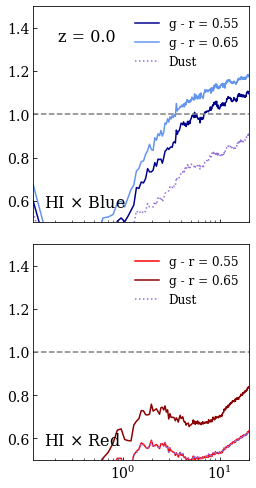

In [98]:
ip = {'path':['colordef', 'fiducial'], 'fieldname':['galaxy', 'galaxy_dust'], 'is_auto':True, 'color':['blue', 'red'],
     'snapshot':99, 'color_cut':['0.55', '0.60', '0.65'], 'space':'real'}
fg = ds.figrid('color_cut', 'color', 'snapshot', ip)
fg.autoNorm({'color_cut':'0.60', 'fieldname':'galaxy'})
cutcols = {'blue':['darkblue', 'cornflowerblue'], 'red':['red', 'darkred']}
idxs = {'blue':(0,0), 'red':(1, 0)}
for col in ['blue', 'red']:
    fg.plotArgs({'color_cut':'0.55', 'color':col}, label = 'g - r = 0.55', color = cutcols[col][0])
    fg.plotArgs({'color_cut':'0.65', 'color':col}, label = 'g - r = 0.65', color = cutcols[col][1])
#     fg.annotatePanel("g - r = 0.65", (0.5, 0.75), idxs[col], color = cutcols[col][1], ha = 'left', fontsize = 12)
#     fg.annotatePanel("g - r = 0.55", (0.5, 0.85), idxs[col], color = cutcols[col][0], ha = 'left', fontsize = 12)

fg.plotArgs({'fieldname':'galaxy_dust'}, label = 'Dust', color = 'mediumpurple', linestyle = ':')
# fg.annotatePanel("Dust")
fg.plotOnes()
fg.colLabels(pos = (0.25,0.9))
fg.plotOrder(['0.55', '0.65', '0.60'])
fg.setXLabel("")
fg.setDefaultTicksParams()
fg.gspecArgs(wspace = 0.1, hspace = 0.1)
fg.axisArgs(yscale = 'linear', ylim = (0.5, 1.5))
fg.legendArgs(slc = (slice(None), 0), fontsize = 12)
fg.plot()
temp = fg

The row values for color: ['blue', 'red']
The column values for snapshot: [67]


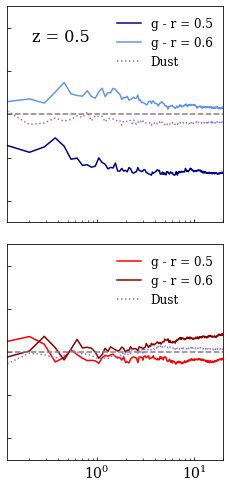

In [5]:
ip = {'path':['colordef', 'fiducial'], 'fieldname':['galaxy', 'galaxy_dust'], 'is_auto':True, 'color':['blue', 'red'],
     'snapshot':67, 'color_cut':['0.50', '0.55', '0.60'], 'space':'real'}
fg = ds.figrid('color_cut', 'color', 'snapshot', ip)
fg.autoNorm({'color_cut':'0.55', 'fieldname':'galaxy'})
cutcols = {'blue':['darkblue', 'cornflowerblue'], 'red':['red', 'darkred']}
for col in ['blue', 'red']:
    fg.plotArgs({'color_cut':'0.50', 'color':col}, label = 'g - r = 0.5', color = cutcols[col][0])
    fg.plotArgs({'color_cut':'0.60', 'color':col}, label = 'g - r = 0.6', color = cutcols[col][1])
fg.plotArgs({'fieldname':'galaxy', 'color_cut':'0.60', 'path':'fiducial'}, label = '_nolegend_', linestyle = 'None')

fg.plotArgs({'fieldname':'galaxy_dust'}, label = 'Dust', color = 'mediumpurple', linestyle = ':')
fg.plotOnes()
fg.tickArgs(labelleft = False)
fg.gspecArgs(wspace = 0.1, hspace = 0.1)
fg.axisArgs(yscale = 'linear', ylim = (0.5, 1.5))
fg.tickArgs(slc = 'blue', labelbottom = False)
fg.legendArgs(slc = (slice(None), 0), fontsize =  12)
fg.colLabels(pos = (0.25,0.9))
fg.rowLabels([""]*2)

fg.setXLabel("")
fg.plot()



Text(0, 0.5, 'P$_{\\mathrm{alt}}$ $(k)$ / P$_{\\mathrm{fid}}$ $(k)$')

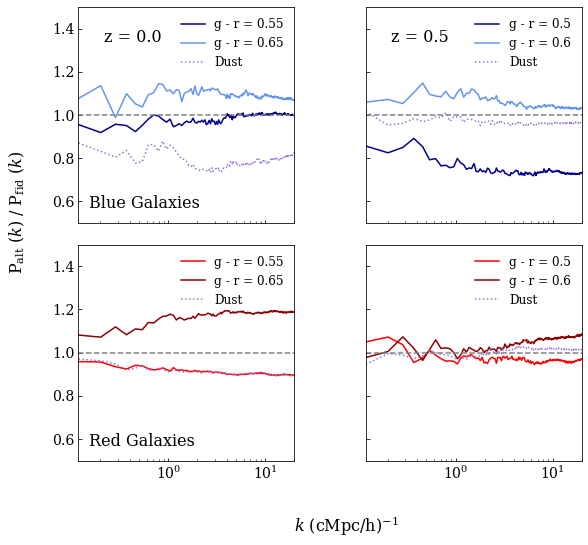

In [6]:
figarr = np.array([temp, fg])
fig = fg.combine(figarr)
fig.text(0.5, 0, pplib.wnum(), fontsize = 16)
fig.text(0, 0.5, pplib.pkrat("alt", "fid"), rotation = 'vertical', fontsize = 16)

In [7]:
fig.savefig("/Users/cosinga/code/hicolor_draft/figures/color_cuts.pdf", dpi = 150, bbox_inches = 'tight')
fig.savefig('color_cuts.png', bbox_inches = 'tight')